In [1]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib widget

In [2]:
WESAD_PATH = "C:/Users/Abhijit/Desktop/PES1201801293/project/WESAD/"

In [3]:
subjects = [s for s in os.listdir(WESAD_PATH) if s.startswith("S")]
subjects.sort()
subjects

['S10',
 'S11',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9']

In [4]:
#run this only once
ORIG_FREQ = 700
def expand_data(data, max_size):

    data_sync = {}
    # copy chest from original
    data_sync['signal'] = {'chest': data['signal']['chest']}.copy()
    
    data_sync['signal']['wrist'] = {}
    # copy labels, subject from original
    data_sync['label'] = data['label']
    data_sync['subject'] = data['subject']
    
    # separate chest ACC into 3 components
    data_sync['signal']['chest']['ACC1'] = data_sync['signal']['chest']['ACC'][:, 0]
    data_sync['signal']['chest']['ACC2'] = data_sync['signal']['chest']['ACC'][:, 1]
    data_sync['signal']['chest']['ACC3'] = data_sync['signal']['chest']['ACC'][:, 2]
    del data_sync['signal']['chest']['ACC']

    # synchronise wrist by duplicating the data (NOT SURE IF THIS IS RIGHT)
    data_sync['signal']['wrist']['BVP'] = np.repeat(data['signal']['wrist']['BVP'], 700//64 + 1, axis=0)[:max_size]
    data_sync['signal']['wrist']['ACC'] = np.repeat(data['signal']['wrist']['ACC'], 700//32 + 1, axis=0)[:max_size]
    data_sync['signal']['wrist']['EDA'] = np.repeat(data['signal']['wrist']['EDA'], 700//4 + 1, axis=0)[:max_size]
    data_sync['signal']['wrist']['TEMP'] = np.repeat(data['signal']['wrist']['TEMP'], 700//4 + 1, axis=0)[:max_size]
    
    # separate ACC into 3 components
    data_sync['signal']['wrist']['ACC1'] = data_sync['signal']['wrist']['ACC'][:, 0]
    data_sync['signal']['wrist']['ACC2'] = data_sync['signal']['wrist']['ACC'][:, 1]
    data_sync['signal']['wrist']['ACC3'] = data_sync['signal']['wrist']['ACC'][:, 2]
    del data_sync['signal']['wrist']['ACC']
    return data_sync

In [5]:
def flatten_sync_data(data):
    data_flat = dict()
    for key, value in data['signal'].items():
        for key2, value2 in data['signal'][key].items():
            if len(value2.shape) > 1:
                data_flat[f"{key}_{key2}"] = value2.flatten()
            else:
                data_flat[f"{key}_{key2}"] = value2
    data_flat['label'] = data['label']
    data_flat['subject'] = data['subject']
    return data_flat

In [6]:
# run this only once
for subject in subjects:
    print(f"Loading {subject}")
    data = pickle.load(open(os.path.join(WESAD_PATH,
                                     subject,
                                     f"{subject}.pkl"), "rb"),
                   encoding="latin1")
    print(f"Expanding {subject}")
    data_sync = expand_data(data, len(data['label']))
    print(f"Flattening {subject}")
    data_flat = flatten_sync_data(data_sync)
    print(f"Converting to DataFrame {subject}")
    df = pd.DataFrame(data_flat)
    print(f"Exporting {subject} to CSV")
    df.to_csv(f'{subject}.csv')
    print(f"Done {subject}")

Loading S10
Expanding S10
Flattening S10
Converting to DataFrame S10
Exporting S10 to CSV
Done S10
Loading S11
Expanding S11
Flattening S11
Converting to DataFrame S11
Exporting S11 to CSV
Done S11
Loading S13
Expanding S13
Flattening S13
Converting to DataFrame S13
Exporting S13 to CSV
Done S13
Loading S14
Expanding S14
Flattening S14
Converting to DataFrame S14
Exporting S14 to CSV
Done S14
Loading S15
Expanding S15
Flattening S15
Converting to DataFrame S15
Exporting S15 to CSV
Done S15
Loading S16
Expanding S16
Flattening S16
Converting to DataFrame S16
Exporting S16 to CSV
Done S16
Loading S17
Expanding S17
Flattening S17
Converting to DataFrame S17
Exporting S17 to CSV
Done S17
Loading S2
Expanding S2
Flattening S2
Converting to DataFrame S2
Exporting S2 to CSV
Done S2
Loading S3
Expanding S3
Flattening S3
Converting to DataFrame S3
Exporting S3 to CSV
Done S3
Loading S4
Expanding S4
Flattening S4
Converting to DataFrame S4
Exporting S4 to CSV
Done S4
Loading S5
Expanding S5
Flat

In [34]:
# selected_subject = subjects[2]

In [145]:
# data = pd.read_csv(f"{selected_subject}.csv")
# data

In [146]:
# data['chest_ECG'].corr(data['chest_Temp'])

In [147]:
# data.isnull().sum()

In [148]:
# dataset = []
# for i in range(15):
#     dataset.append(subjects[i])
# for i in dataset:
#     d = pd.read_csv(f"{i}.csv")
#     print(d.isnull().sum())

In [149]:
# len(data)

In [150]:
# outliers=[]
# def detect_outlier(data_1):
    
#     threshold=3
#     mean_1 = np.mean(data_1)
#     std_1 =np.std(data_1)
    
    
#     for y in data_1:
#         z_score= (y - mean_1)/std_1 
#         if np.abs(z_score) > threshold:
#             outliers.append(y)
#     return outliers
# outlier_datapoints = detect_outlier(data)
# print(outlier_datapoints)

In [151]:
# chest_ecg = data['chest_ECG']

# len(chest_ecg)

In [152]:
# sorted(chest_ecg)

In [153]:
# q1, q3= np.percentile(chest_ecg,[25,75])

In [154]:
# q1,q3

In [155]:
# iqr = q3 - q1
# iqr
# lower_bound = q1 - (1.5 * (abs(q1)))
# upper_bound = q3 + (1.5 * (abs(q3)))

In [157]:
# lower_bound,upper_bound

In [158]:
# c = 0
# for i in chest_ecg:
#     if i<lower_bound or i>upper_bound:
#         c+=1 
# print(c)

In [159]:
# import matplotlib.pyplot as plot

# data['chest_ECG'].plot.box(title="Box and whisker plot for Chest ECG", grid=True);

# plot.show(block=True);

In [160]:
# data['chest_ECG'].corr(data['chest_EMG'])

In [161]:
# a = pd.read_csv(f"{'s2'}.csv")

In [ ]:
# b = pd.read_csv(f"{'s4'}.csv")
# c = pd.read_csv(f"{'s5'}.csv")
# d = pd.read_csv(f"{'s6'}.csv")
# e = pd.read_csv(f"{'s7'}.csv")
# f = pd.read_csv(f"{'s8'}.csv")
# g = pd.read_csv(f"{'s9'}.csv")

In [ ]:
# a['chest_ECG'].mean()

In [ ]:
# l.append(a['chest_ECG'].mean())
# l.append(b['chest_ECG'].mean())
# l.append(c['chest_ECG'].mean())
# l.append(d['chest_ECG'].mean())
# l.append(e['chest_ECG'].mean())
# l.append(f['chest_ECG'].mean())
# l.append(g['chest_ECG'].mean())
# l

# k = [23,25,23,27,25,27,28]

In [ ]:
# data['wrist_BVP'].corr(data['wrist_ACC1'])

In [ ]:
# subject_infos = []
# subjects_to_be_calculated = []
# for i in range(15):
#     subjects_to_be_calculated.append(subjects[i])
# for selected_subject in subjects_to_be_calculated:
#         data = pd.read_csv(f"{selected_subject}.csv")
#         subject_infos.append(data.describe())

# for subject, des in zip(subjects, subject_infos):
#     display(des)


In [ ]:
# subject_infos[0]['chest_ECG']

In [ ]:
# labels = []
# for i in range(15):
#     if i<10:
#         labels.append("S"+str(i+2))
#     else:
#         labels.append("S"+str(i+3))
# means = []
# std_dev = []
# for i in range(15):
#     means.append(subject_infos[i]['chest_Temp']['mean'])
#     std_dev.append(subject_infos[i]['chest_ECG']['std'])
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.set_ylim([30,35.5])
# ax.set_ylabel('Temperature in Degrees')
# ax.set_title('CHEST Temp means of differents Subjects')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.bar(labels,means)
# plt.show()

In [39]:
selected_subject = subjects[10]
data = pd.read_csv(f"{selected_subject}.csv")
new_data = data[data["label"].isin((1,2,3,4))]
s = pd.Series([i+1 for i in range(len(new_data))])
new_data = new_data.set_index([s])

In [40]:
pca = PCA(n_components=2)

In [41]:
data_columns = [
    'chest_ECG', 'chest_EMG', 'chest_EDA', 'chest_Temp',
    'chest_Resp', 'chest_ACC1', 'chest_ACC2', 'chest_ACC3', 'wrist_BVP',
    'wrist_EDA', 'wrist_TEMP', 'wrist_ACC1', 'wrist_ACC2', 'wrist_ACC3']
#data_1 = data.copy()
X = new_data[data_columns]
#X = np.array(X)

In [43]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
pca.explained_variance_ratio_

array([0.91940077, 0.04111421])

In [46]:
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()
finalDf=pd.concat([principalDf,new_data['label']],axis=1)
finalDf.head()

,principal component 1,principal component 2,label
0,25.571737,-5.139493,NaN
1,25.571733,-5.139678,1.0
2,25.571734,-5.139239,1.0
3,25.571735,-5.139442,1.0
4,25.571734,-5.139677,1.0


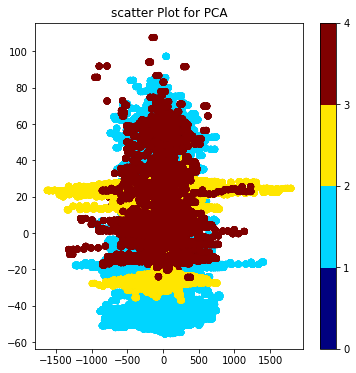

In [49]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
X = finalDf['principal component 1']
Y = finalDf['principal component 2']
N = new_data['label'].nunique()
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(X,Y,c=finalDf['label'],cmap=cmap,norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
ax.set_title('scatter Plot for PCA')
plt.show()